In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
from numpy.random import normal


# Normal DIstribution

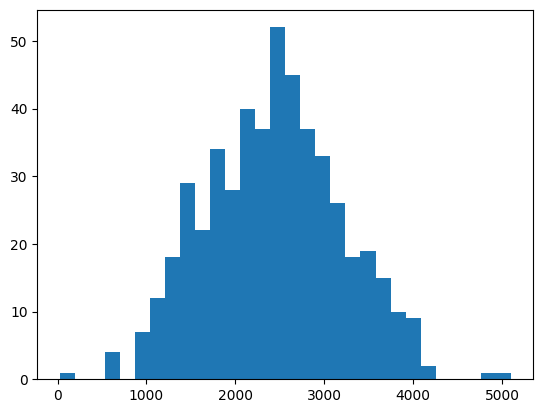

In [138]:
data = normal(loc=2400, scale=750, size=500)

fsd = data.tolist()

count, bins, ignored = plt.hist(data, 30)
plt.show()

In [3]:
# data from https://data.world/marineinstitute/35a18e98-2706-4eb3-b064-46a8a66baf91

ocean_df = pd.read_csv("ocean.csv")[["latitude", "WavePeriod"]].dropna()[1:].astype(float)
north_df = ocean_df[ocean_df["latitude"] >= 45]


C:\Users\evtol\AppData\Local\Temp\ipykernel_11480\1642292475.py:3: DtypeWarning: Columns (1,2,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  ocean_df = pd.read_csv("ocean.csv")[["latitude", "WavePeriod"]].dropna()[1:].astype(float)


(array([1.72060e+04, 1.90349e+05, 1.28952e+05, 1.49826e+05, 3.52090e+04,
        1.71960e+04, 1.65200e+03, 1.11000e+02, 3.60000e+01, 8.00000e+00]),
 array([ 2. ,  3.6,  5.2,  6.8,  8.4, 10. , 11.6, 13.2, 14.8, 16.4, 18. ]),
 <BarContainer object of 10 artists>)

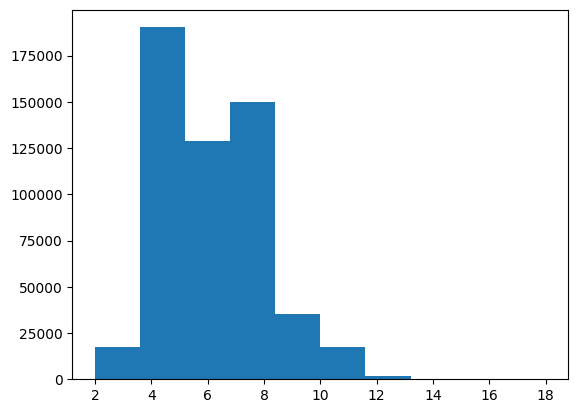

In [4]:
waves = north_df.iloc[:,1].tolist()

plt.hist(waves)

In [5]:
def rand_period():
    pick = random.choice(waves)
    return pick

def rand_wave():
    pick = rand_period()
    wavelength = (9.8 * pick)/(2*3.14)
    return (wavelength, pick)

# result is wavelength, time period

wavelength, time_period = rand_wave()        


In [35]:
# make an initial dictionary of sizes and counts based off the normal distribution with mean 2400

fsd_dict = {}

for value in fsd:
    if round(value) in fsd_dict:
        fsd_dict[round(value)] += 1
    else:
        fsd_dict[round(value)] = 1
#fsd[24000.0] = 1                          # ice width in meters
total_time = 0
break_num = 0
posibilities = 0

for i in range(1000000):
    if total_time >= 86400:                 # stops after one day has passed
        break
    posibilities += 1
    sizes = list(fsd_dict.keys())               # get a list of all the available sizes 
    location = float(random.choice(sizes))   # choose a random spot were the ice will split
    wavelength, time_period = rand_wave()         # get a random wavelength
    total_time += time_period
    if fsd_dict[location] == 0:
        continue
    elif location/wavelength > 1:            # see if the ice will break
        break_num += 1
        new_ice = location/2              # make a variable for the new ice dimensions  
        fsd_dict[location] += -1
        if new_ice in fsd_dict:                 # check and see if this new ice is in the dict
            fsd_dict[new_ice] += 4              # add four to the count (bc ice divides into four pices)
                       # remove one from the old size since it broke
        else:                              
            fsd_dict[new_ice] = 4               # if not in dict, add to dict

bps = (break_num/86400)  # breaks per second
bpm = bps* 60   # breaks per minute

break_num/posibilities


0.6965566205182818

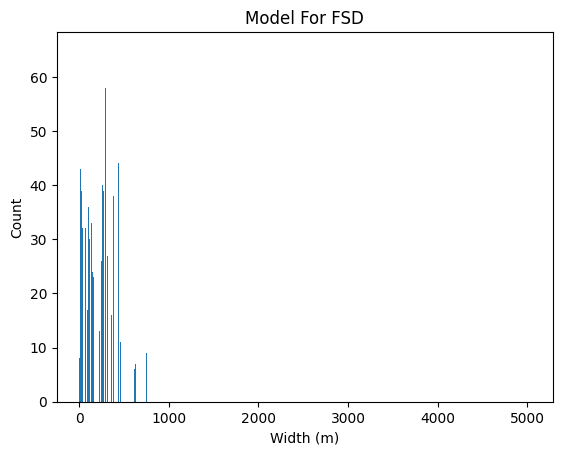

In [8]:
import numpy as np

sizes = list(fsd_dict.keys()) 
counts = list(fsd_dict.values())

d = {'sizes': sizes, 'count': counts}
ice = pd.DataFrame(data=d)

plt.bar(sizes, counts,
        width = 0.4)
 
plt.xlabel("Width (m)")
plt.ylabel("Count")
plt.title("Model For FSD")
plt.show()

  # Welding And Fracturing Model

In [139]:
def welds(C, time):
    N = (-0.001/2)*pow(C,2)*time
    return N

In [140]:
# the number of floes per m squared decreased by -1.8 floes per m squared PER HOUR

meters_sq = 0

for val in fsd:
    meters_sq += pow(round(val),2)

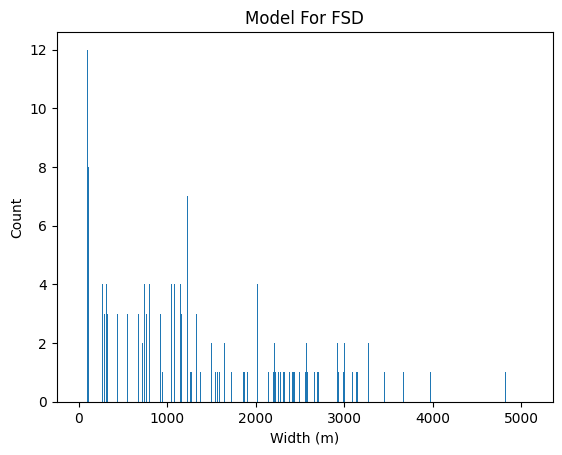

In [145]:
# make an initial dictionary of sizes and counts based off the normal distribution with mean 2400

fsd_dict = {}

for value in fsd:
    if round(value) in fsd_dict:
        fsd_dict[round(value)] += 1
    else:
        fsd_dict[round(value)] = 1
#fsd[24000.0] = 1                          # ice width in meters
total_time = 0
break_num = 0
posibilities = 0

for i in range(1000000000000000000000000000000000):
    if total_time >= 86400:                 # stops after one day has passed
        break
    posibilities += 1                          # get the amount of possible preaks
    sizes = list(fsd_dict.keys())               # get a list of all the available sizes 
    location = float(random.choice(sizes))   # choose a random spot were the ice will split
    wavelength, time_period = rand_wave()         # get a random wavelength
    total_time += time_period                     # add wave period to total time
    weld = welds(1,time_period)                   # find the welding for that time period of wave
    weld_perc = (meters_sq + (meters_sq *weld))/meters_sq   # find out what % of floes there should be with welding
    floes_decreased = round(len(sizes)-(len(sizes)*weld_perc)) # how many floes get welded
    
    if floes_decreased > 0:
        for i in range(floes_decreased):
            rand_floe = float(random.choice(sizes))   # choose a random spot were the ice will weld
            welded_width = rand_floe * 2             # find the welded width
            if fsd_dict[rand_floe] < 4:
                floes_decreased += 1               # if there are not at least 4 floes to weld it picks a new spot
            else:
                if welded_width in fsd_dict:
                    fsd_dict[welded_width] += 1              # add the larger floe to the dict by adding one
                    fsd_dict[rand_floe] -= 4
                else:
                    fsd_dict[welded_width] = 1
                    fsd_dict[rand_floe] -= 4

    if fsd_dict[location] == 0:
        continue
    elif location/wavelength > 1:            # see if the ice will break
        break_num += 1
        new_ice = location/2              # make a variable for the new ice dimensions  
        fsd_dict[location] += -1
        if new_ice in fsd_dict:                 # check and see if this new ice is in the dict
            fsd_dict[new_ice] += 4              # add four to the count (bc ice divides into four pices)
                       # remove one from the old size since it broke
        else:                              
            fsd_dict[new_ice] = 4               # if not in dict, add to dict

bps = (break_num/86400)  # breaks per second
bpm = bps* 60   # breaks per minute

import numpy as np

sizes = list(fsd_dict.keys()) 
counts = list(fsd_dict.values())

d = {'sizes': sizes, 'count': counts}
ice = pd.DataFrame(data=d)

plt.bar(sizes, counts,
        width = 1.8)
 
plt.xlabel("Width (m)")
plt.ylabel("Count")
plt.title("Model For FSD")
plt.show()

## Wind

In [9]:
wind = pd.read_csv("03-NASA-U_daily.csv")[4:]
new_header = wind.iloc[1] #grab the first row for the header
wind = wind[3:] #take the data less the header row
wind.columns = new_header #set the header row as the df header

In [10]:
# wind speed is in m/s

wind_speed = wind[["wind_speed_1", "wind_speed_2"]].dropna()

wind_speed.max()

5
wind_speed_1    9.99
wind_speed_2    9.99
dtype: object